In [ ]:
!ls '/content/drive/MyDrive/Stage/Stage Falcon/test_1/data'

images	labels


In [ ]:
DATA_DIR = '/content/drive/MyDrive/Stage/Stage Falcon/test_1/data'

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.9/626.9 kB 7.8 MB/s eta 0:00:00


In [ ]:
import os
from ultralytics import YOLO

model = YOLO('yolov8n-seg.pt')  # load a pretrained model (recommended for training)

model.train(data='/content/drive/MyDrive/Stage/Stage Falcon/test_1/config.yaml', epochs=50, imgsz=640)

100%|██████████| 6.73M/6.73M [00:00<00:00, 54.9MB/s]
Ultralytics YOLOv8.0.131 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/drive/MyDrive/Stage/Stage Falcon/test_1/config.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_

In [ ]:
import shutil

# Define the source and destination paths
source_path = '/content/runs'
destination_path = '/content/drive/MyDrive/Stage/Stage Falcon/test_1/runs'

# Copy the directory to the destination
shutil.copytree(source_path, destination_path)

'/content/drive/MyDrive/Stage/Stage Falcon/test_1/runs'

**Test**

---



In [ ]:
!export LC_ALL=C.UTF-8

In [ ]:
!scp -r /content/runs '/content/drive/MyDrive/Stage/Stage Falcon/test_1' # copy run file to the mentionned directory



---



**Eliminating a text from an image**

In [ ]:
import os
images_paths=[]
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Stage/Stage Falcon/Dataset_2'):
    for filename in sorted(filenames):
        print(os.path.join(dirname, filename))
        images_paths.append(os.path.join(dirname, filename))

/content/drive/MyDrive/Stage/Stage Falcon/Dataset_2/W0003_0001.png
/content/drive/MyDrive/Stage/Stage Falcon/Dataset_2/W0003_0002.png
/content/drive/MyDrive/Stage/Stage Falcon/Dataset_2/W0003_0003.png
/content/drive/MyDrive/Stage/Stage Falcon/Dataset_2/W0003_0004.png
/content/drive/MyDrive/Stage/Stage Falcon/Dataset_2/W0003_0005.png
/content/drive/MyDrive/Stage/Stage Falcon/Dataset_2/W0003_0006.png
/content/drive/MyDrive/Stage/Stage Falcon/Dataset_2/W0003_0007.png
/content/drive/MyDrive/Stage/Stage Falcon/Dataset_2/W0003_0008.png
/content/drive/MyDrive/Stage/Stage Falcon/Dataset_2/W0003_0009.png
/content/drive/MyDrive/Stage/Stage Falcon/Dataset_2/W0003_0010.png
/content/drive/MyDrive/Stage/Stage Falcon/Dataset_2/W0003_0011.png
/content/drive/MyDrive/Stage/Stage Falcon/Dataset_2/W0003_0012.png
/content/drive/MyDrive/Stage/Stage Falcon/Dataset_2/W0003_0013.png
/content/drive/MyDrive/Stage/Stage Falcon/Dataset_2/W0003_0014.png
/content/drive/MyDrive/Stage/Stage Falcon/Dataset_2/W0003_0015

In [ ]:
!pip install keras_ocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 42.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 5.6 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=f96f36d8d18b58ad123fd19648f818789acfc95070682ac59661bf111313da2a
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built validators


In [ ]:
import matplotlib.pyplot as plt
import keras_ocr
import cv2
import math
import numpy as np

In [ ]:
#The start point will be the mid-point between the top-left corner and
#the bottom-left corner of the box.
#the end point will be the mid-point between the top-right corner and the bottom-right corner.
#The following function does exactly that.
def midpoint(x1, y1, x2, y2):
    x_mid = int((x1 + x2)/2)
    y_mid = int((y1 + y2)/2)
    return (x_mid, y_mid)

In [ ]:
def inpaint_text(img_path, pipeline):
    # read the image
    img = keras_ocr.tools.read(img_path)

    # Recogize text (and corresponding regions)
    # Each list of predictions in prediction_groups is a list of
    # (word, box) tuples.
    prediction_groups = pipeline.recognize([img])

    #Define the mask for inpainting
    mask = np.zeros(img.shape[:2], dtype="uint8")
    for box in prediction_groups[0]:
        x0, y0 = box[1][0]
        x1, y1 = box[1][1]
        x2, y2 = box[1][2]
        x3, y3 = box[1][3]

        x_mid0, y_mid0 = midpoint(x1, y1, x2, y2)
        x_mid1, y_mi1 = midpoint(x0, y0, x3, y3)

        #For the line thickness, we will calculate the length of the line between
        #the top-left corner and the bottom-left corner.
        thickness = int(math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 ))

        #Define the line and inpaint
        cv2.line(mask, (x_mid0, y_mid0), (x_mid1, y_mi1), 255,
        thickness)
        inpainted_img = cv2.inpaint(img, mask, 7, cv2.INPAINT_NS)

    return(inpainted_img)

**Preprocessing mask bloc**


---



In [ ]:
new_width, new_height =1000,500
pipeline = keras_ocr.pipeline.Pipeline()
for image_path in images_paths :
  img=cv2.imread(image_path)

  img_text_removed = inpaint_text(image_path, pipeline)
  image = cv2.resize(img_text_removed, (new_width, new_height), interpolation=cv2.INTER_LINEAR)

  #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  edges = cv2.Canny(image,100,200)
  new_path=os.path.join('/content/drive/MyDrive/Stage/Stage Falcon/masks_dataset_2',os.path.basename(image_path))
  cv2.imwrite(new_path, cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 0s 492ms/step




---



In [ ]:
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [ ]:
img=cv2.imread('/content/sample_data/W0003_0001.png')
cv2_imshow(img)
plt.imshow(img)

Output hidden; open in https://colab.research.google.com to view.

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 3s 3s/step


True

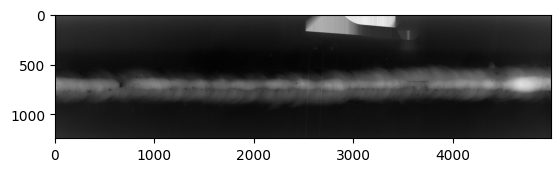

In [ ]:
pipeline = keras_ocr.pipeline.Pipeline()

img_text_removed = inpaint_text('/content/sample_data/W0003_0001.png', pipeline)

plt.imshow(img_text_removed)

cv2.imwrite('text_removed_image.jpg', cv2.cvtColor(img_text_removed, cv2.COLOR_BGR2RGB))

In [ ]:
import cv2

# Load the image
image = cv2.imread('/content/text_removed_image.jpg', 0)  # Read the image in grayscale mode

# Apply CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_image = clahe.apply(image)

# Save the processed image
cv2.imwrite('output_image.jpg', clahe_image)

True

**Test**


---



In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Ri8L2SNpLueNzuqN9KCn")
project = rf.workspace("insat-6tisn").project("test-svrvl")
dataset = project.version(1).download("png-mask-semantic")




---

